In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from specified paths
csv_data = pd.read_csv("sales_data_sample.csv", encoding="ISO-8859-1")
excel_data = pd.read_excel("Sample-Sales-Data.xlsx")
json_data = pd.read_json("sample4.json")

# Display the first row of each dataset to confirm successful loading
print("CSV Data Sample:\n", csv_data.head(1))
print("Excel Data Sample:\n", excel_data.head(1))
print("JSON Data Sample:\n", json_data.head(1))

# Concatenate datasets into a single DataFrame and reset index
df = pd.concat([csv_data, excel_data, json_data], ignore_index=True)

# Identify and convert columns with unhashable types (like dicts)
for col in df.columns:
    if df[col].apply(lambda x: isinstance(x, dict)).any():
        print(f"Column '{col}' contains dictionaries or unhashable types and will be converted to strings.")
        df[col] = df[col].apply(lambda x: str(x) if isinstance(x, dict) else x)

# Display a random sample of rows to check the merged data
print("Sample Data:\n", df.sample(3))

# Data overview
print("Data Description:\n", df.describe())
print("Data Info:\n")
df.info()
print("Data Types:\n", df.dtypes)

# Data Cleaning
print("Missing Values by Column:\n", df.isna().sum())
print("Number of Duplicates Before Dropping:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Number of Duplicates After Dropping:", df.duplicated().sum())

# Analysis: Ensure required columns are present
if 'Total' in df.columns and 'Gender' in df.columns and 'Product line' in df.columns:
    # Total sales
    total_sales = df['Total'].sum()
    print("Total Sales:", total_sales)

    # Average order value by gender
    average_order_value = df.groupby('Gender')['Total'].mean()
    print("Average Order Value by Gender:\n", average_order_value)

    # Product category distribution
    product_category_distribution = df['Product line'].value_counts()
    print("Product Category Distribution:\n", product_category_distribution)

    # Column names
    print("DataFrame Columns:\n", df.columns)

    # Visualization
    # Boxplot of numerical data
    df.boxplot(column=['Total'])  # Adjust 'Total' if needed to match your column names
    plt.title('Boxplot of Total Sales')
    plt.show()

    # Bar plot of Total Sales by Product Category
    plt.figure(figsize=(12, 6))
    df.groupby('Product line')['Total'].sum().plot(kind='bar', color='skyblue')
    plt.xlabel('Product Category')
    plt.ylabel('Total Sales Amount')
    plt.title('Total Sales by Product Category')
    plt.xticks(rotation=20)
    plt.show()
else:
    print("Required columns 'Total', 'Gender', or 'Product line' not found in DataFrame.")


CSV Data Sample:
    ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER   SALES  \
0        10107               30       95.7                2  2871.0   

        ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0  2/24/2003 0:00  Shipped       1         2     2003  ...   

              ADDRESSLINE1  ADDRESSLINE2 CITY STATE POSTALCODE COUNTRY  \
0  897 Long Airport Avenue           NaN  NYC    NY      10022     USA   

  TERRITORY CONTACTLASTNAME CONTACTFIRSTNAME DEALSIZE  
0       NaN              Yu             Kwai    Small  

[1 rows x 25 columns]
Excel Data Sample:
    Postcode  Sales_Rep_ID Sales_Rep_Name  Year         Value
0      2121           456           Jane  2011  84219.497311
JSON Data Sample:
                                               people
0  {'firstName': 'Joe', 'lastName': 'Jackson', 'g...
Column 'people' contains dictionaries or unhashable types and will be converted to strings.
Sample Data:
       ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINEN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Names      6 non-null      object 
 1   Max_Temp   6 non-null      float64
 2   Min_Temp   6 non-null      float64
 3   Humidity   6 non-null      int64  
 4   WindSpeed  6 non-null      float64
dtypes: float64(3), int64(1), object(1)
memory usage: 372.0+ bytes


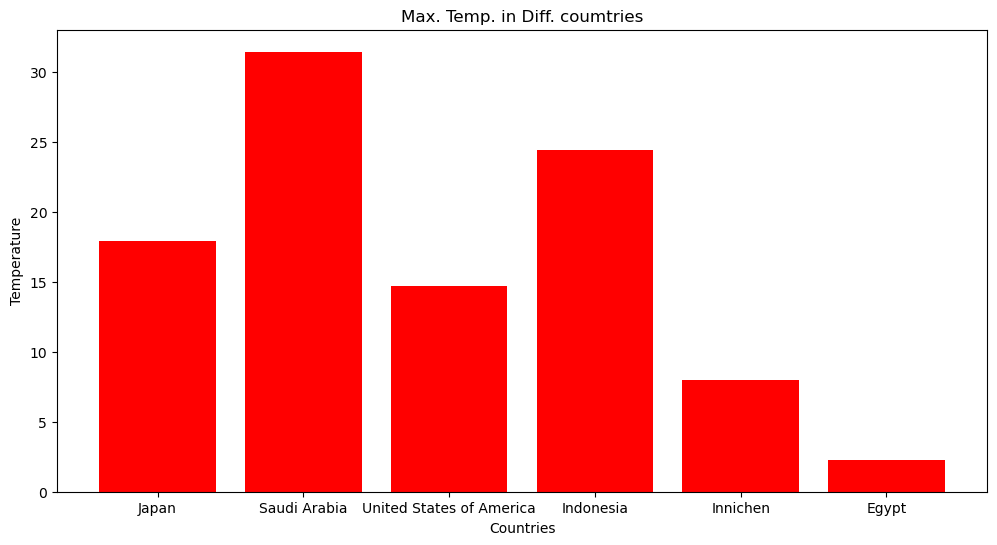

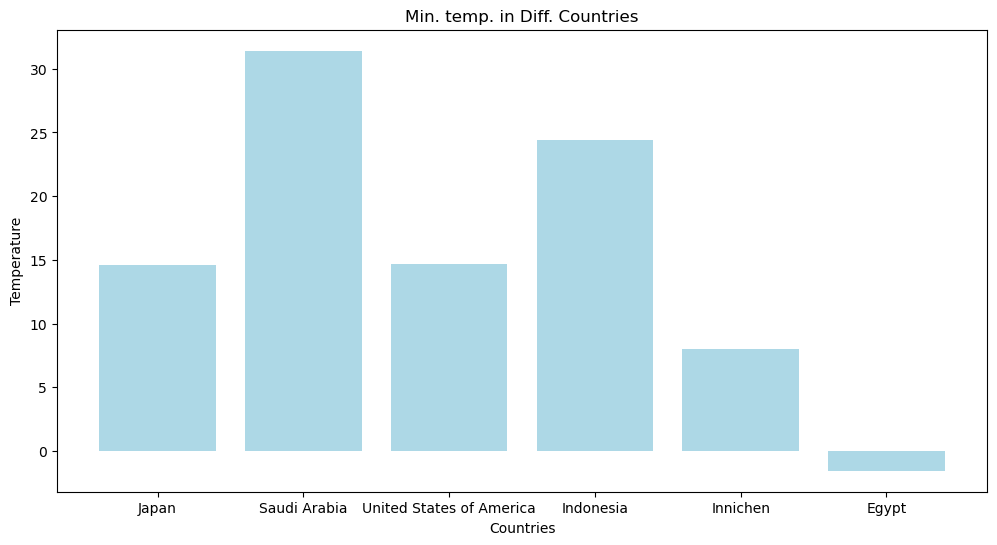

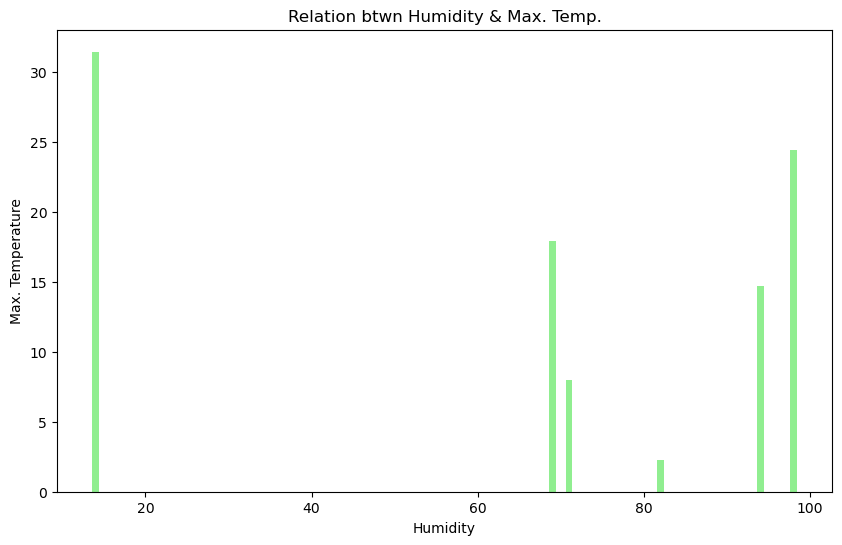

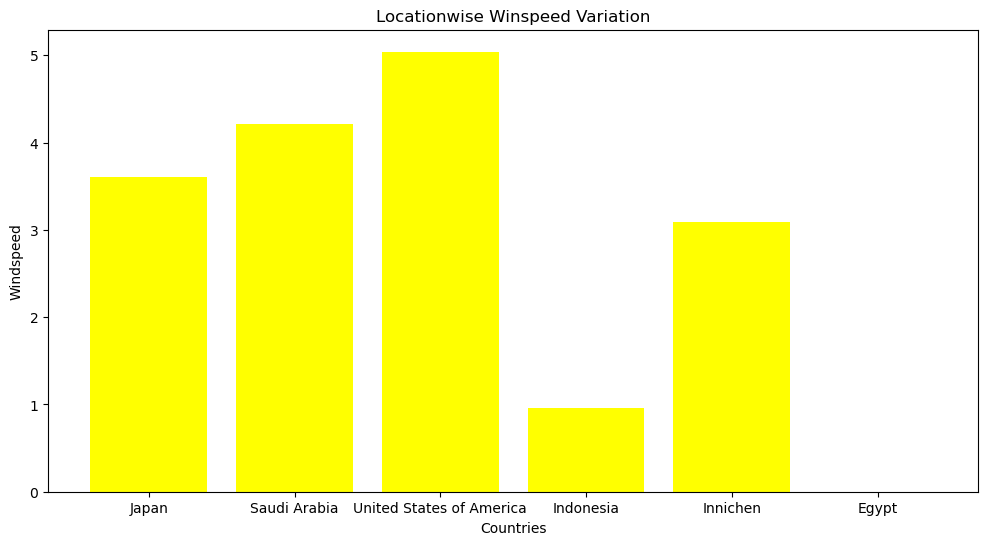

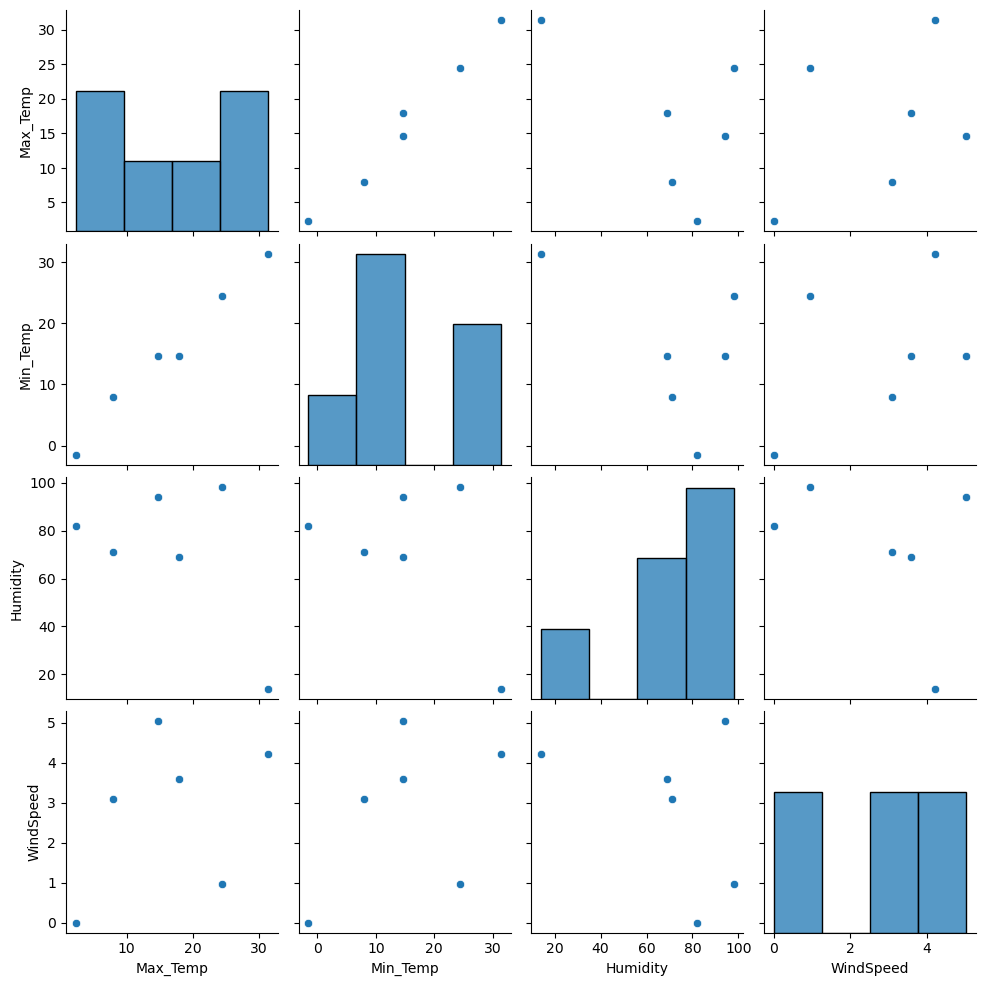

In [4]:
#Interacting with Web APIs Problem Statement: Analyzing Weather Data from OpenWeatherMap API.
#The goal is to interact with the OpenWeatherMap API to retrieve weather data for a
#specific location and perform data modeling and visualization to analyze weather patterns over time.

import requests
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

API_key = '91dc4e027d565d766d090eec6efb196c'
countries = ['Japan' , 'Saudi Arabia' , 'United States of America' , 'Indonesia' , 'India' , 'Egypt']

country_name_list = []
maxtemp = []
mintemp = []
humidity = []
windspeed = []

for country_names in countries:
    url = f"https://api.openweathermap.org/data/2.5/weather?q={country_names}&appid={API_key}&units=metric"

    r = requests.get(url)

    data = r.json()

    formatted_json = json.dumps(data, sort_keys=True, indent=4)

    country_name_list.append(data['name'])
    maxtemp.append(data['main']['temp_max'])
    mintemp.append(data['main']['temp_min'])
    humidity.append(data['main']['humidity'])
    windspeed.append(data['wind']['speed'])

df = pd.DataFrame()
df['Names'] = country_name_list
df['Max_Temp'] = maxtemp
df['Min_Temp'] = mintemp
df['Humidity'] = humidity
df['WindSpeed'] = windspeed

df.head()
df
df.describe()
df.info()
df.duplicated().sum()

average_temperature = df.groupby('Names')['Max_Temp'].mean()
average_temperature

average_temperature = df.groupby('Names')['Min_Temp'].mean()
average_temperature

plt.figure(figsize=(12,6))
plt.bar(df['Names'],df['Max_Temp'], color = 'red')
plt.title('Max. Temp. in Diff. coumtries')
plt.xlabel('Countries')
plt.ylabel('Temperature')
plt.show()

plt.figure(figsize=(12,6))
plt.bar(df['Names'],df['Min_Temp'],color = 'lightblue')
plt.title('Min. temp. in Diff. Countries')
plt.xlabel('Countries')
plt.ylabel('Temperature')
plt.show()

plt.figure(figsize=(10,6))
plt.bar(df['Humidity'],df['Max_Temp'],color='lightgreen')
plt.title('Relation btwn Humidity & Max. Temp.')
plt.xlabel('Humidity')
plt.ylabel('Max. Temperature')
plt.show()

plt.figure(figsize=(12,6))
plt.bar(df['Names'],df['WindSpeed'],color='yellow')
plt.title('Locationwise Winspeed Variation')
plt.xlabel('Countries')
plt.ylabel('Windspeed')
plt.show()

sns.pairplot(df)
plt.show()